# Pymaceuticals Inc.
---

### Analysis

My analysis of this data yeilded the following observations:

Treatment Efficacy: Among the four main drug regimens analyzed (Capomulin, Ramicane, Infubinol, and Ceftamin), Capomulin and Ramicane appear to be more effective in reducing the size of tumors. This inference is based on the final tumor volume data, where the median tumor volume for mice under these treatments was lower compared to Infubinol and Ceftamin. Additionally, the presence of potential outliers in the Infubinol group suggests variability in its efficacy.

Gender Distribution: The distribution of female versus male mice in the study was nearly equal, indicating a balanced approach to gender in the experimental design. This balanced distribution helps ensure that the study results are not biased by gender-specific responses to the treatments.

Correlation Between Weight and Tumor Volume: For mice treated with Capomulin, there was a strong positive correlation between mouse weight and average tumor volume. This suggests that heavier mice tend to have larger tumors, which could imply that weight is a factor in tumor growth or that the efficacy of Capomulin varies with the size of the mouse. This observation underscores the importance of considering body weight as a variable in the analysis of treatment outcomes.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the DataFrames into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the first few rows of the merged DataFrame
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
unique_mice_count = merged_df['Mouse ID'].nunique()
unique_mice_count

249

In [15]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Display the number of unique mice IDs
unique_mice_count = merged_df['Mouse ID'].nunique()

# Check for any mouse ID with duplicate time points
duplicate_mice = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]

# Display the data associated with any duplicate mouse ID
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [16]:
# Optional: Get all the data for the duplicate mouse ID. 

In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice in the clean DataFrame.
updated_unique_mice_count = cleaned_df['Mouse ID'].nunique()
updated_unique_mice_count

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_df = cleaned_df.groupby('Drug Regimen')

summary_stats = grouped_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

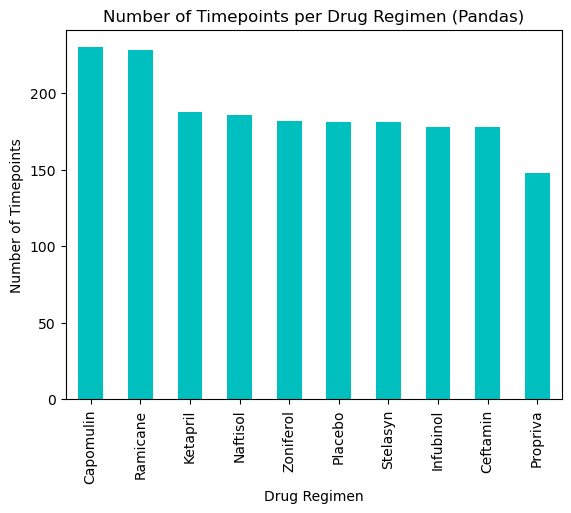

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
ax_pandas = cleaned_df['Drug Regimen'].value_counts().plot(kind='bar', title='Number of Timepoints per Drug Regimen (Pandas)', color='c')
ax_pandas.set_xlabel('Drug Regimen')
ax_pandas.set_ylabel('Number of Timepoints')
plt.show()

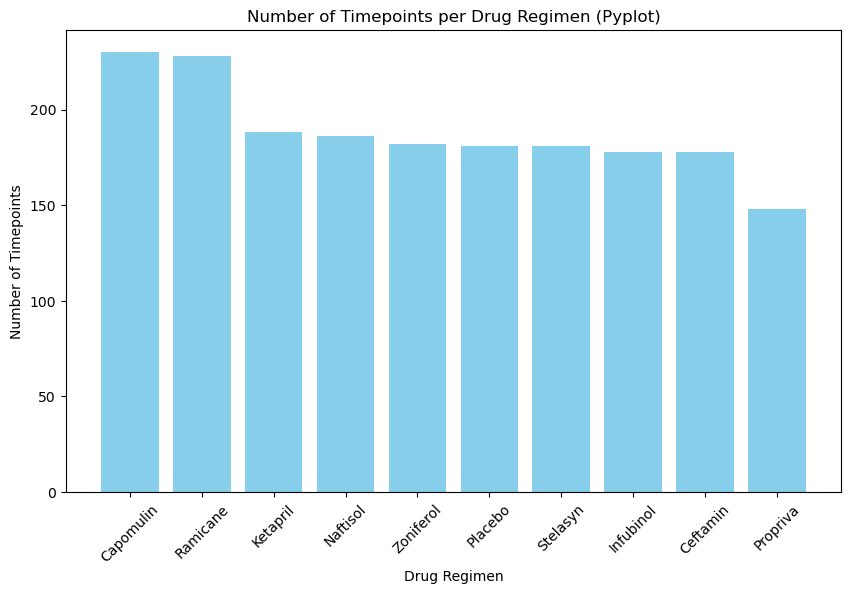

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')
plt.title('Number of Timepoints per Drug Regimen (Pyplot)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)
plt.show()

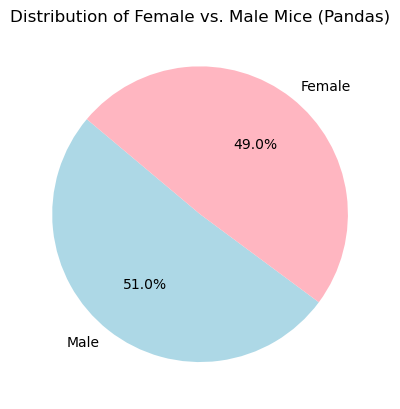

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution_pandas = cleaned_df['Sex'].value_counts()
ax_pie_pandas = sex_distribution_pandas.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'], title='Distribution of Female vs. Male Mice (Pandas)')
ax_pie_pandas.set_ylabel('')
plt.show()

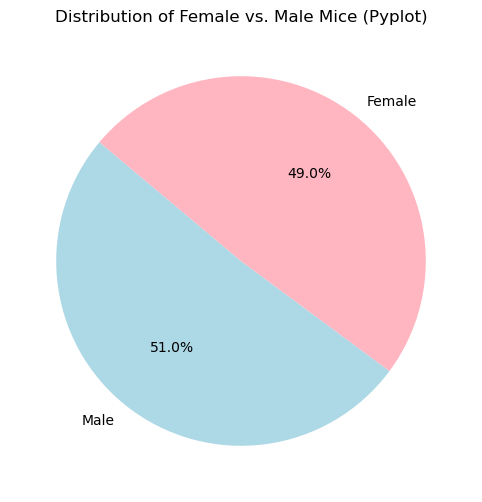

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8,6))
plt.pie(sex_distribution_pandas, labels=sex_distribution_pandas.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Distribution of Female vs. Male Mice (Pyplot)')
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_final_timepoint_df = pd.merge(last_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_final_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [31]:
# Calculate the final tumor volume of each mouse across the four treatment regimens

# Create a grouped DataFrame to find the last time point for each mouse
last_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this with the original cleaned DataFrame
merged_final_timepoint_df = pd.merge(last_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

# Treatment regimens of interest
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to fill with tumor volume data
tumor_vol_data = []

# Loop through each drug in the treatment list
for drug in treatment_list:
    # Locate the rows in the DataFrame that correspond to each treatment
    final_tumor_vol = merged_final_timepoint_df.loc[merged_final_timepoint_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers.values}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


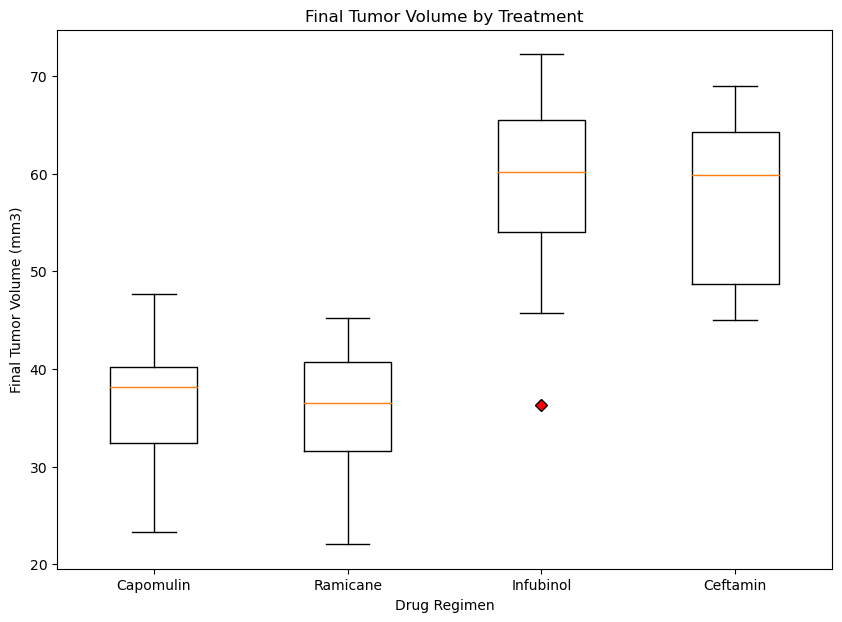

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,7))
plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops=dict(markerfacecolor='r', marker='D'))
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

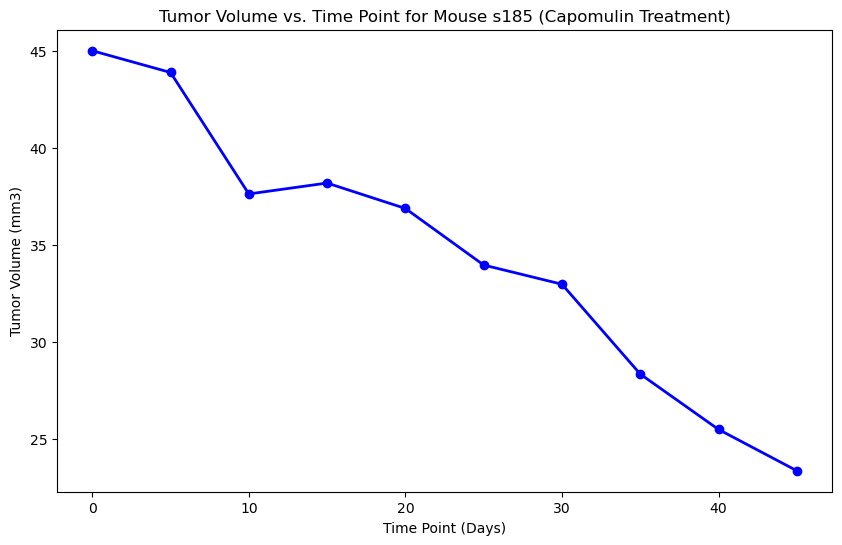

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_df['Mouse ID'].iloc[0]

# Data for the selected mouse
selected_mouse_data = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

# Line plot for the selected mouse
plt.figure(figsize=(10,6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

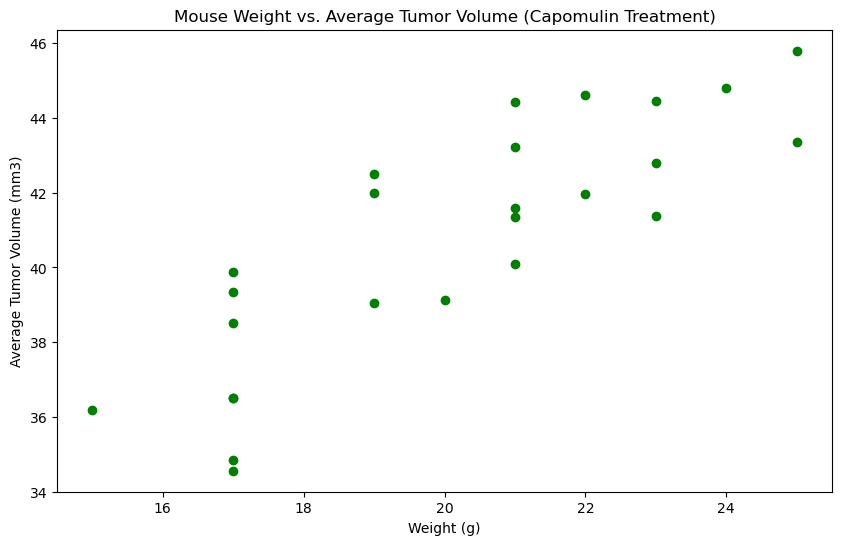

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Grop by mouse ID and calculate the average tumor volume
avg_tumor_vol_by_weight = capomulin_df.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(avg_tumor_vol_by_weight['Weight (g)'], avg_tumor_vol_by_weight['Tumor Volume (mm3)'], color='green')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

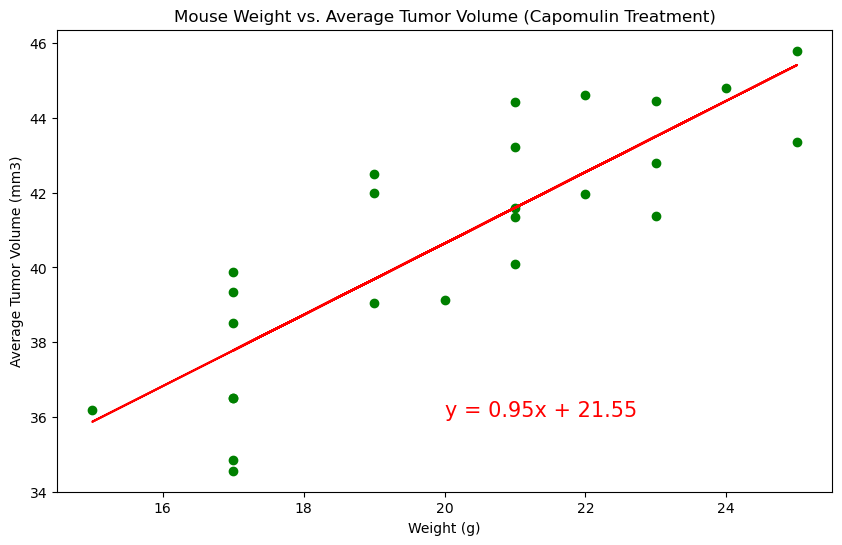

(0.8419363424694719, 0.9544396890241049, 21.552160532685008)

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation = avg_tumor_vol_by_weight[['Weight (g)', 'Tumor Volume (mm3)']].corr().iloc[0,1]

# Calculate the linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(avg_tumor_vol_by_weight['Weight (g)'], avg_tumor_vol_by_weight['Tumor Volume (mm3)'])

# Create a line equation based on the linear regression
line_eq = slope * avg_tumor_vol_by_weight['Weight (g)'] + intercept

# Plotting the linear regression model on top of the previous scatter plot
plt.figure(figsize=(10,6))
plt.scatter(avg_tumor_vol_by_weight['Weight (g)'], avg_tumor_vol_by_weight['Tumor Volume (mm3)'], color='green')
plt.plot(avg_tumor_vol_by_weight['Weight (g)'], line_eq, color="red")
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (20,36), fontsize=15, color="red")

# Show the plot with the linear regression model
plt.show()

(correlation, slope, intercept)

In [37]:
print("the correlation is", correlation)

the correlation is 0.8419363424694719
